Available columns in the dataset:
Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')
Mean Squared Error: 0.4058913994349308
R^2 Score: 0.9996429282807796


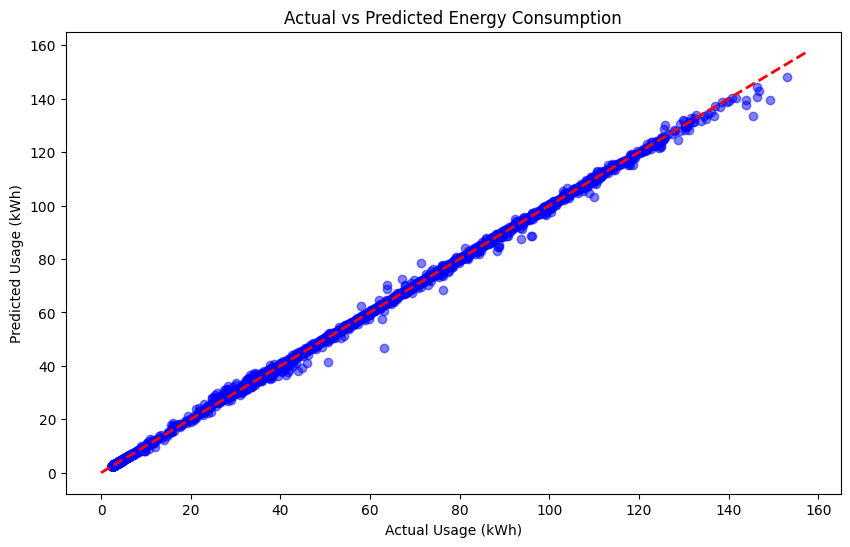

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Steel_industry_data.csv')

# Check the column names and print them
print("Available columns in the dataset:")
print(df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime format using the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Extract hour and day of the week from 'date'
df['Hour'] = df['date'].dt.hour
df['DayOfWeek'] = df['date'].dt.dayofweek

# Select features and target variable
features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
            'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Hour', 'DayOfWeek']
X = df[features]
y = df['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicted Usage (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

Available columns in the dataset:
Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')
Mean Squared Error: 0.8509430861497774
R^2 Score: 0.999251406383202


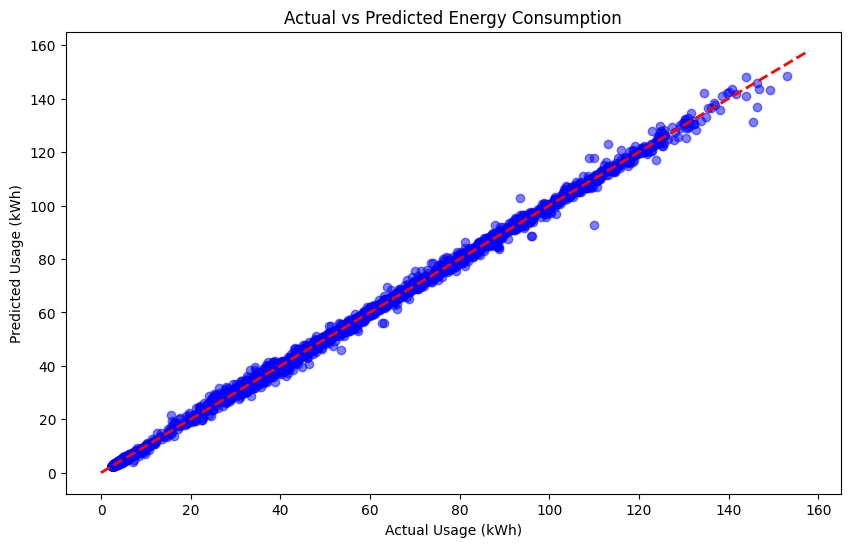

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the dataset
df = pd.read_csv('Steel_industry_data.csv')

# Check the column names and print them
print("Available columns in the dataset:")
print(df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime format using the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Extract hour and day of the week from 'date'
df['Hour'] = df['date'].dt.hour
df['DayOfWeek'] = df['date'].dt.dayofweek

# Select features and target variable
features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
            'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Hour', 'DayOfWeek']
X = df[features]
y = df['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicted Usage (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

Comparison of other Algorithms

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('Steel_industry_data.csv')

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime format using the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Extract hour and day of the week from 'date'
df['Hour'] = df['date'].dt.hour
df['DayOfWeek'] = df['date'].dt.dayofweek

# Select features and target variable
features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
            'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Hour', 'DayOfWeek']
X = df[features]
y = df['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Evaluate each model
mse_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name} - Mean Squared Error: {mse}")

# Compare MSEs
print("\nComparison of Mean Squared Errors:")
for name, mse in mse_results.items():
    print(f"{name}: {mse}")

Linear Regression - Mean Squared Error: 102.24908282724832
Support Vector Regression - Mean Squared Error: 41.68780159568983
K-Nearest Neighbors - Mean Squared Error: 4.379074597031963
Decision Tree - Mean Squared Error: 1.112052711187215

Comparison of Mean Squared Errors:
Linear Regression: 102.24908282724832
Support Vector Regression: 41.68780159568983
K-Nearest Neighbors: 4.379074597031963
Decision Tree: 1.112052711187215


Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Mean Squared Error: 0.7289616250465544
R^2 Score: 0.9993587161958508


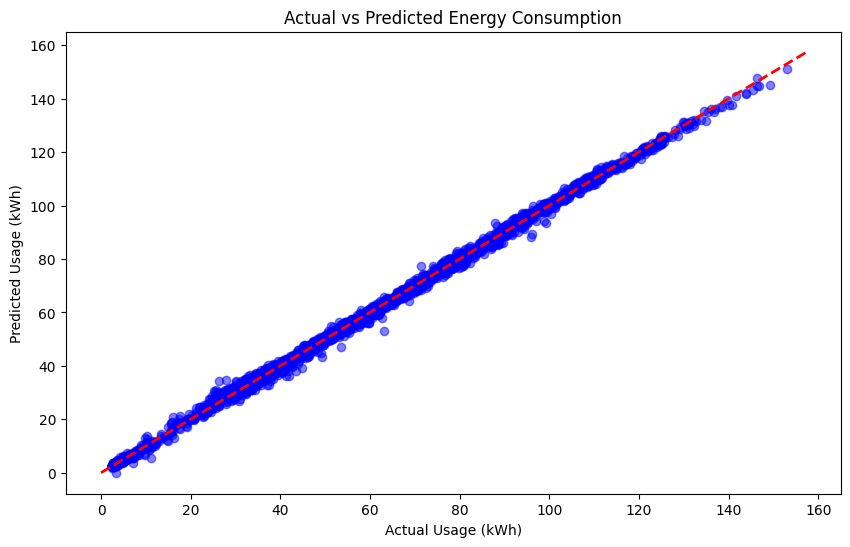

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Steel_industry_data.csv')

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime format using the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Extract hour and day of the week from 'date'
df['Hour'] = df['date'].dt.hour
df['DayOfWeek'] = df['date'].dt.dayofweek

# Select features and target variable
features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
            'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Hour', 'DayOfWeek']
X = df[features]
y = df['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Set up hyperparameter grid for tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicted Usage (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()